In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
import warnings
warnings.filterwarnings('ignore')

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)
#df.head()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [12]:
# Select the columns to be normalized
cols_to_norm = ['X2', 'X3', 'X4']

# Apply Z-score scaling on the selected columns
scaler = StandardScaler()
df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,-1.785875,-0.561951,-1.470077,7.0,2,0.0,0,15.55,21.33
1,0.98,-1.785875,-0.561951,-1.470077,7.0,3,0.0,0,15.55,21.33
2,0.98,-1.785875,-0.561951,-1.470077,7.0,4,0.0,0,15.55,21.33
3,0.98,-1.785875,-0.561951,-1.470077,7.0,5,0.0,0,15.55,21.33
4,0.90,-1.229239,0.000000,-1.198678,7.0,2,0.0,0,20.84,28.28


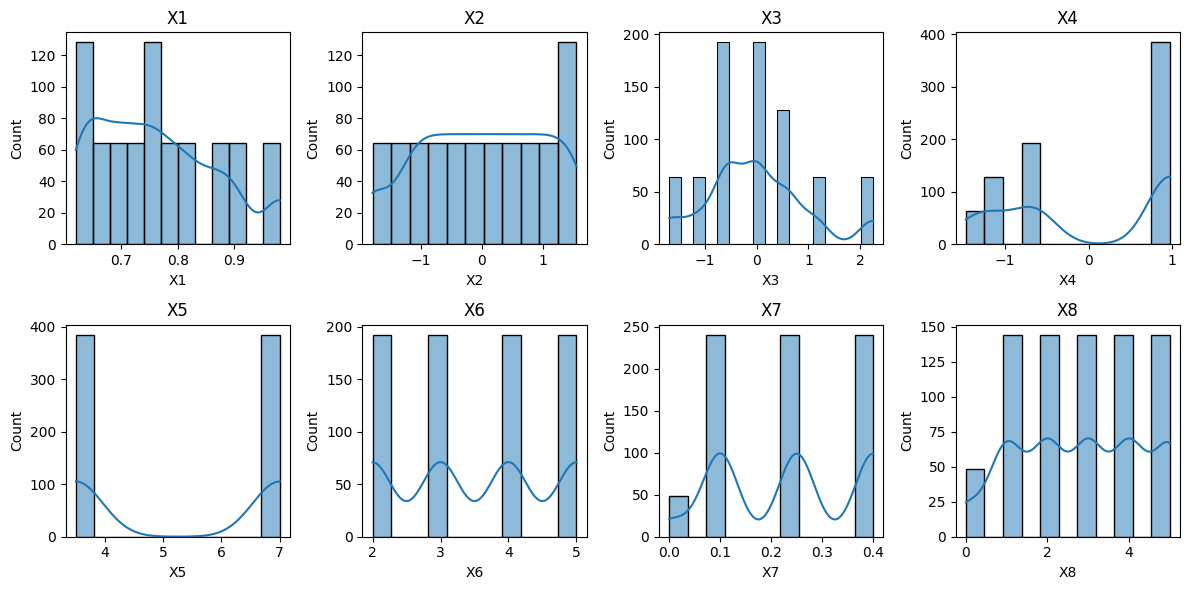

In [13]:
cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Create subplots for each selected column
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Loop over each selected column and plot a histogram
for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title(col)

plt.tight_layout()
plt.show()

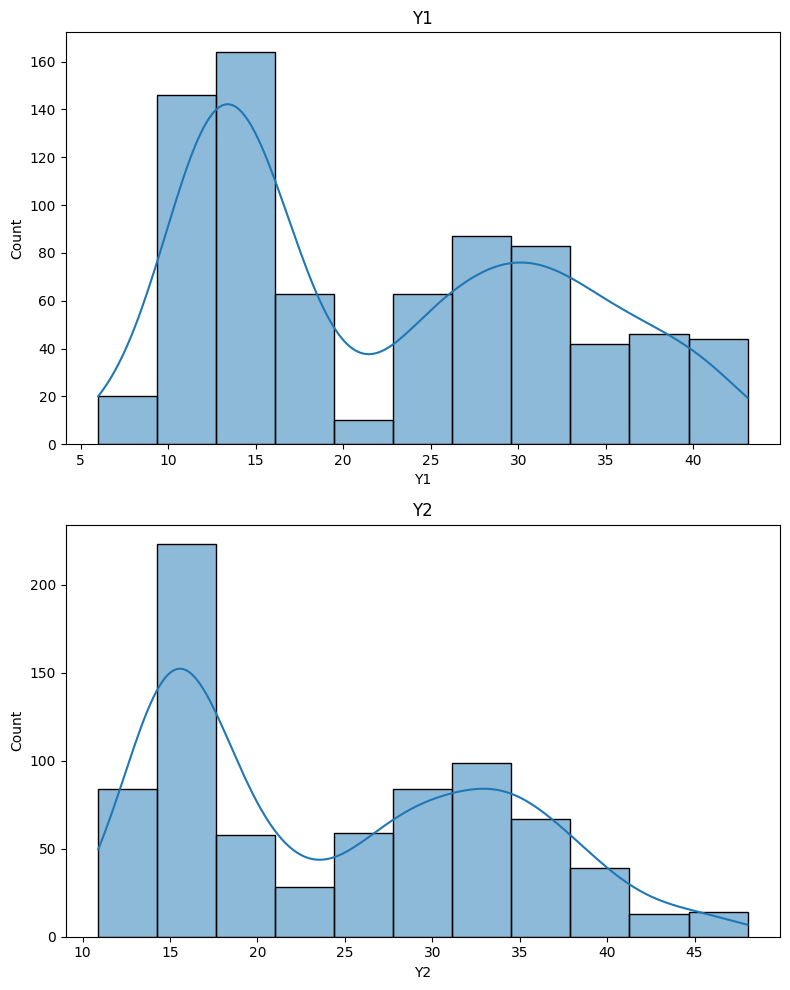

In [14]:
# Select the columns for univariate analysis
output_cols = ['Y1', 'Y2']

# Create subplots for each selected column
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Loop over each selected column and plot a histogram
for i, col in enumerate(output_cols):
    sns.histplot(df[col], kde=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

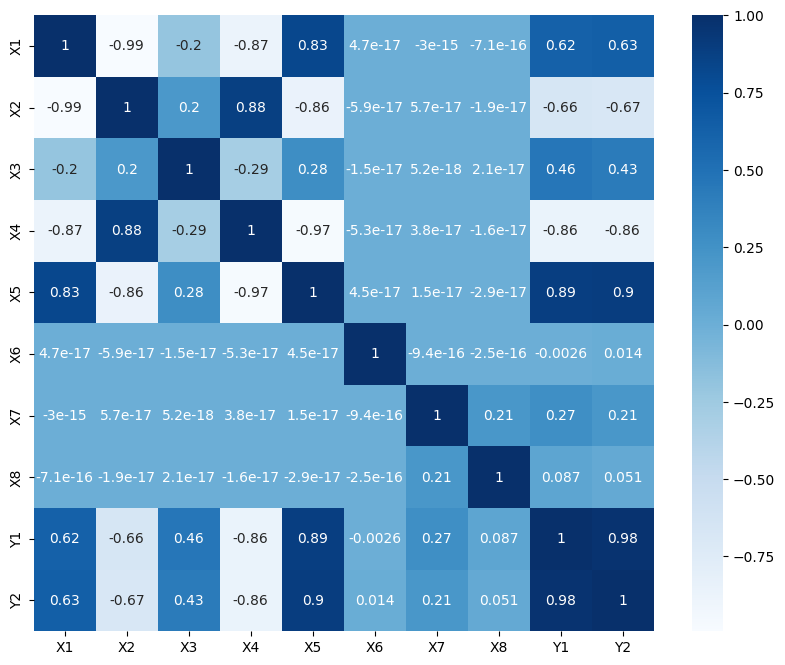

In [15]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.show()

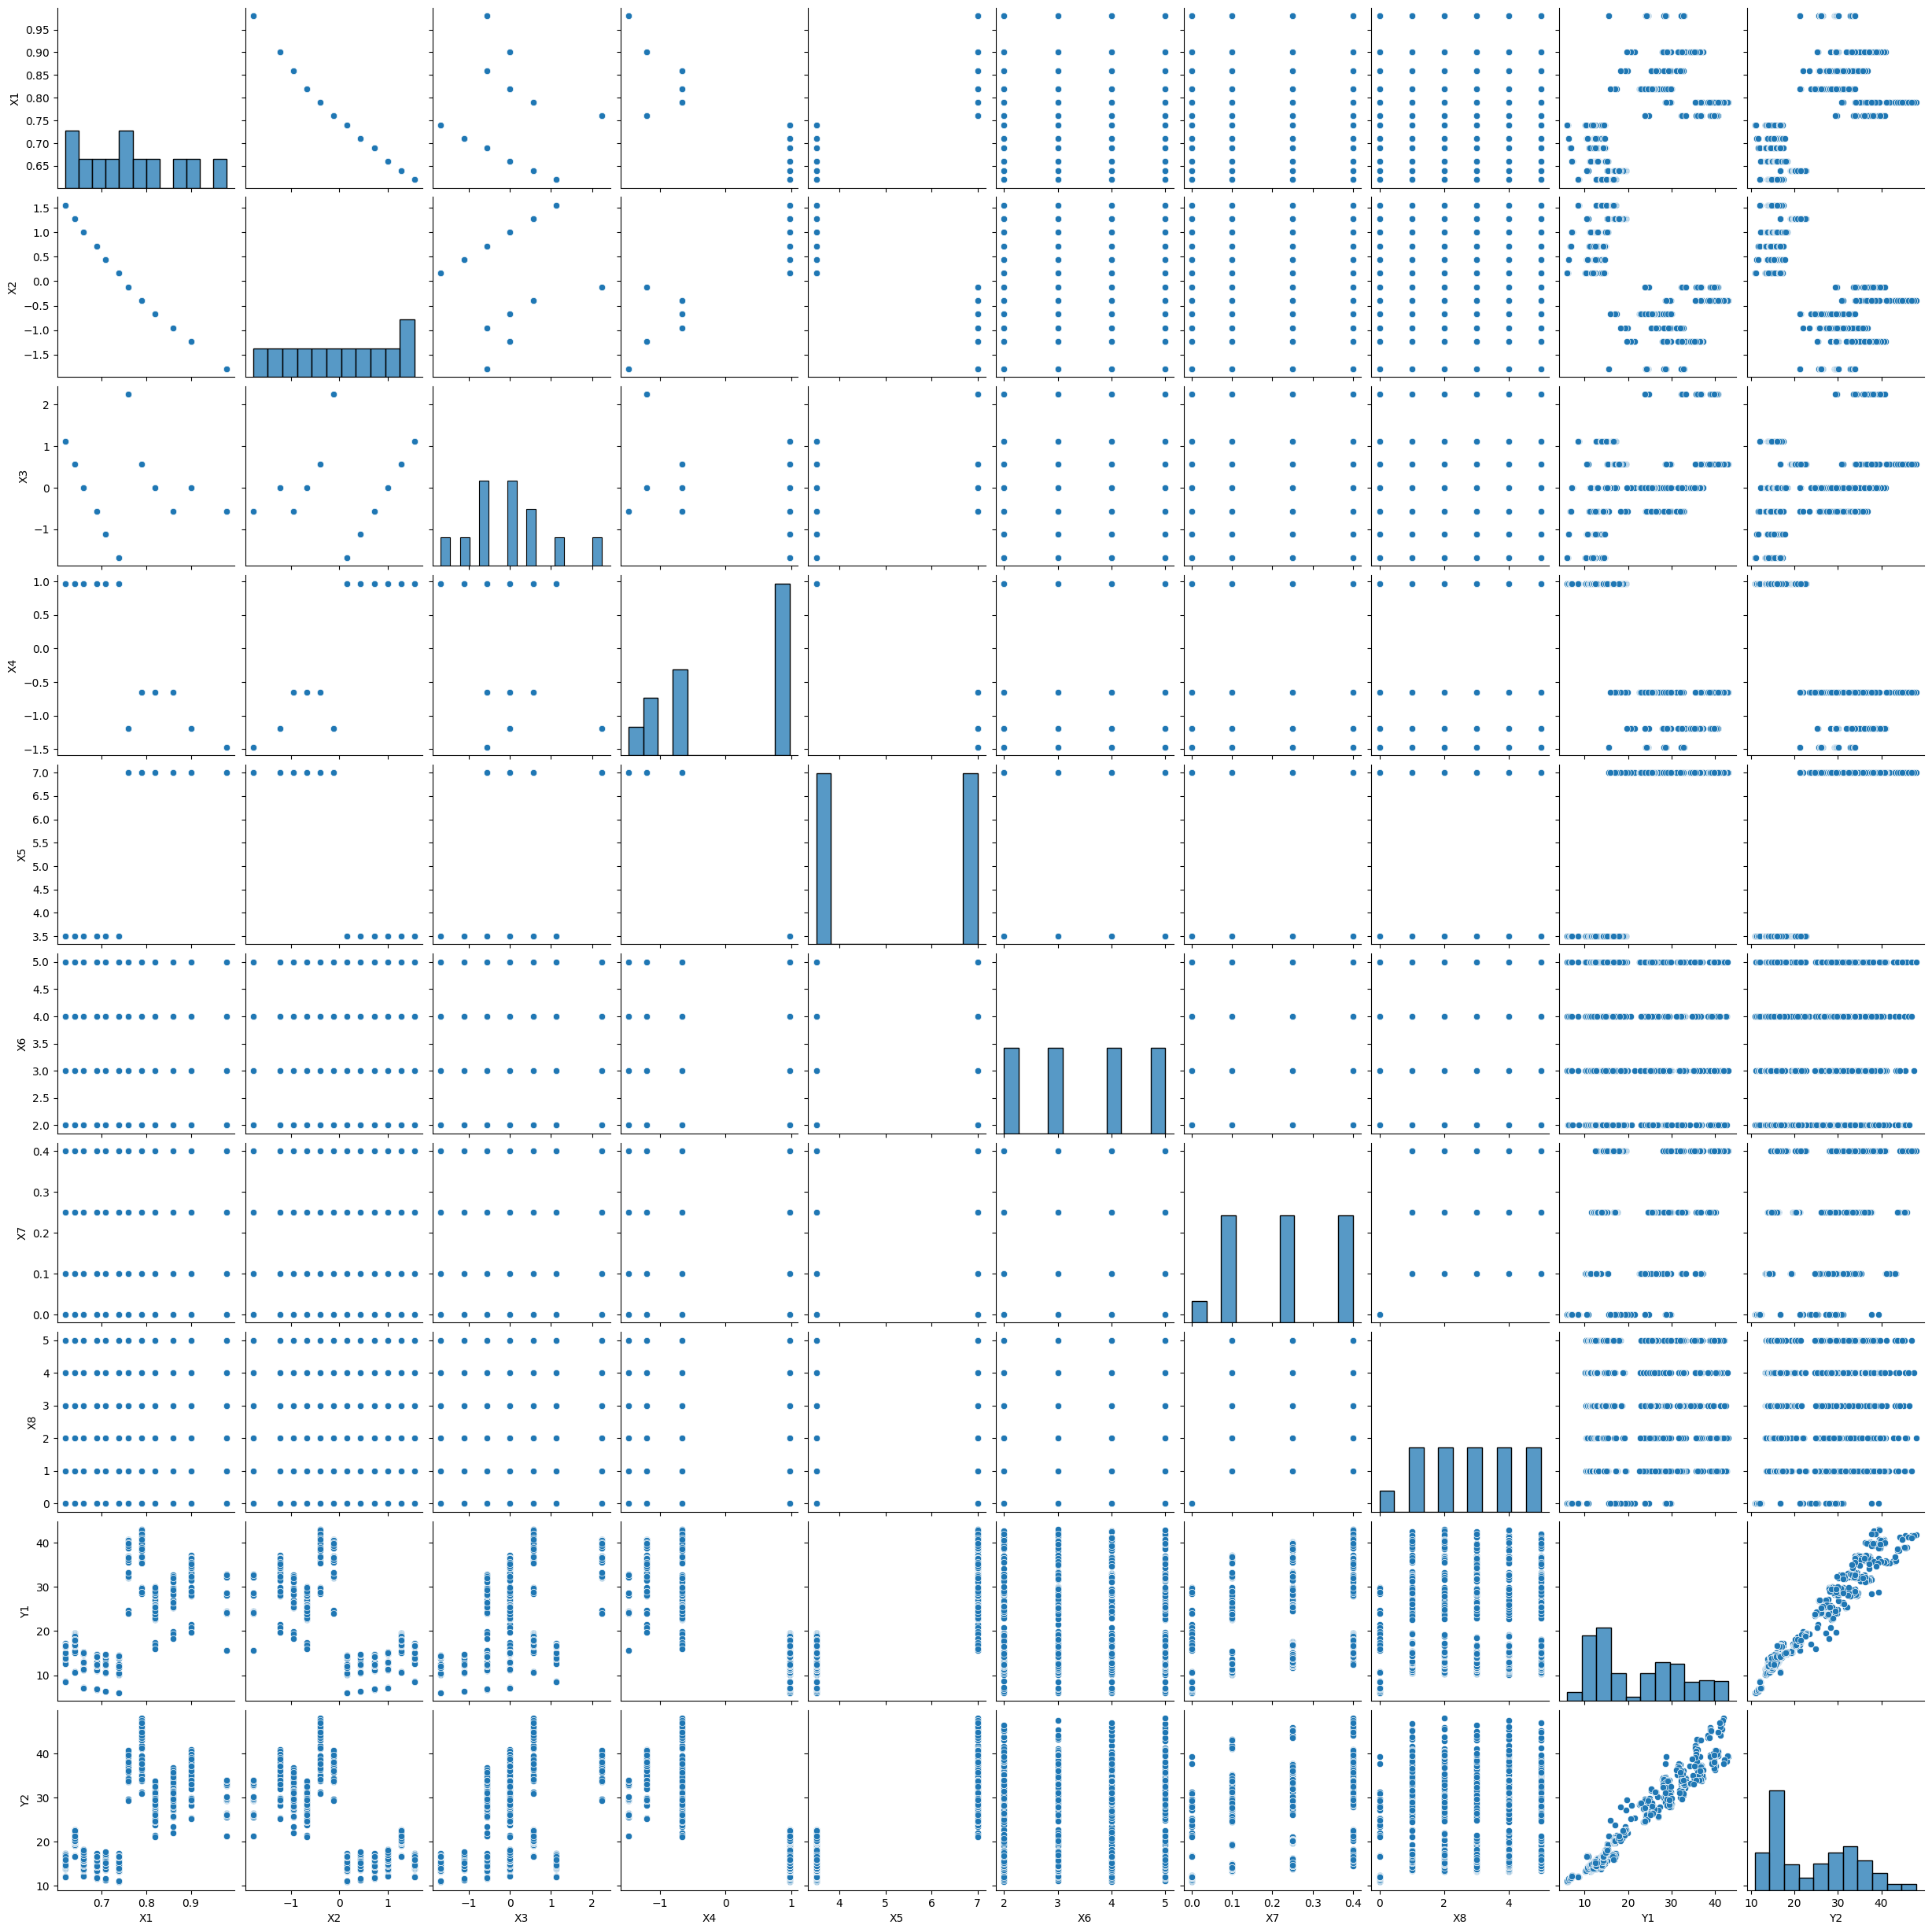

In [16]:
sns.pairplot(df)

In [17]:
X = df[['X1', 'X3', 'X7']].values
y = df['Y1'].values

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define the kernel function for the Gaussian Process
kernel = ConstantKernel(1.0) * RBF(length_scale=1.0)

# Create a Gaussian Process Regression model
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Fit the model to the training data
gpr.fit(X_train, y_train)

# Predict on the test data
y_pred = gpr.predict(X_test)

In [20]:
print("Gaussian Process Regression Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Gaussian Process Regression R^2 Score:", r2_score(y_test, y_pred))

Gaussian Process Regression Mean Squared Error: 0.29254830381873964
Gaussian Process Regression R^2 Score: 0.997193307668561


In [21]:
# Train and evaluate a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, lr_y_pred))
print("Linear Regression R^2 Score:", r2_score(y_test, lr_y_pred))

# Train and evaluate a Random Forest Regression model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Random Forest Regression Mean Squared Error:", mean_squared_error(y_test, rf_y_pred))
print("Random Forest Regression R^2 Score:", r2_score(y_test, rf_y_pred))

# Train and evaluate a Support Vector Regression model
svr = SVR()
svr.fit(X_train, y_train)
svr_y_pred = svr.predict(X_test)
print("Support Vector Regression Mean Squared Error:", mean_squared_error(y_test, svr_y_pred))
print("Support Vector Regression R^2 Score:", r2_score(y_test, svr_y_pred))

Linear Regression Mean Squared Error: 21.169730886100915
Linear Regression R^2 Score: 0.7968987665932208
Random Forest Regression Mean Squared Error: 0.2517380111388057
Random Forest Regression R^2 Score: 0.997584839371235
Support Vector Regression Mean Squared Error: 38.07912653849629
Support Vector Regression R^2 Score: 0.6346709550238472


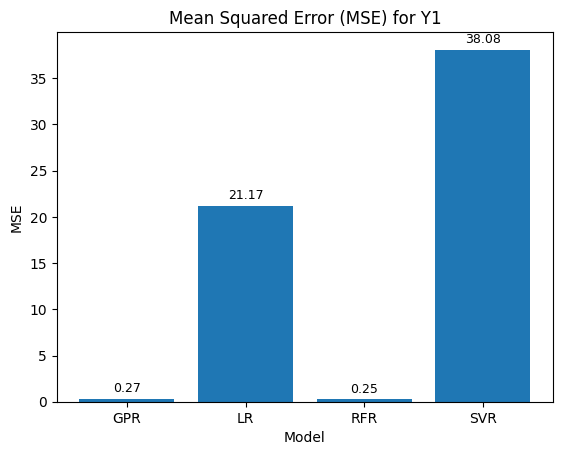

In [22]:
models = ['GPR', 'LR', 'RFR', 'SVR']
mse_y1 = [0.271, 21.169, 0.252, 38.079]
r2_y1 = [0.998, 0.797, 0.997, 0.635]

# Create a bar chart for MSE Y1
fig, ax = plt.subplots()
ax.bar(models, mse_y1)

# Set chart title and axis labels
ax.set_title('Mean Squared Error (MSE) for Y1')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')

# Add the numerical values to the bars
for i, v in enumerate(mse_y1):
    ax.text(i, v + np.max(mse_y1)*0.02, str(round(v, 2)), ha='center', fontsize=9)

# Display the chart
plt.show()

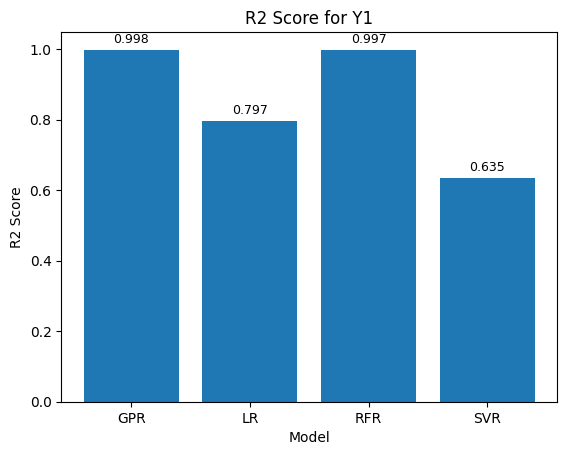

In [23]:
# Create a bar chart for R2 Y1
fig, ax = plt.subplots()
ax.bar(models, r2_y1)

# Set chart title and axis labels
ax.set_title('R2 Score for Y1')
ax.set_xlabel('Model')
ax.set_ylabel('R2 Score')

# Add the numerical values to the bars
for i, v in enumerate(r2_y1):
    ax.text(i, v + np.max(r2_y1)*0.02, str(round(v, 3)), ha='center', fontsize=9)

# Display the chart
plt.show()